In [1]:
## Calculating the submarine melting flux Qsm
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

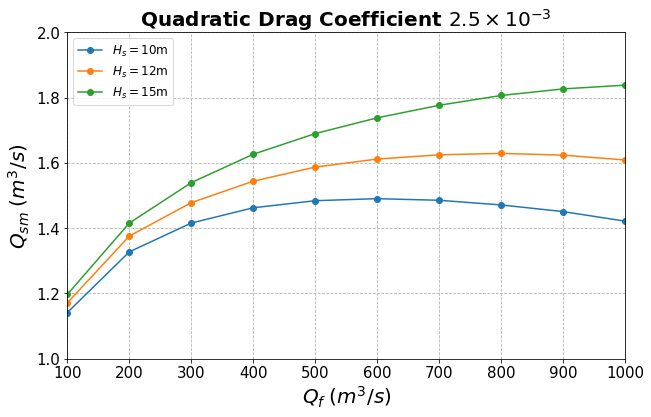

In [16]:
Hs = [10, 12, 15] # Sill depth
Qf = np.linspace(100,1000,10) # Freshwater discharge

# Grid areas
Area = np.empty([50, 9])
Area[:10,:] = 100
Area[10:20,:] = 200
Area[20:30,:] = 300
Area[30:40,:] = 800
Area[40:,:] = 1600

fig, ax =plt.subplots(figsize=(10,6))
ax.set_xlim([100, 1000])
ax.set_ylim([1, 2])
ax.set_xticks(Qf)
plt.grid(linestyle='--')
#ax.set_xticklabels(np.linspace(0,120,13, dtype = int), size = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('$Q_f\;(m^3/s)$', size=20)
plt.ylabel('$Q_{sm}\;(m^3/s)$', size =20)
for s in range(len(Hs)):
    files = sorted(glob.glob('/Users/weiyangbao/Documents/Model_outputs/drag_' + str(format(Hs[s],'03d')) + '/icefrntA*.nc'))
    Qsm = np.empty(len(files))
    for i in range(len(files)):
        state0 = xr.open_dataset(files[i])
        t0 = 60 # Start from day 30
        tn = len(state0.T) # End day
        state = state0.isel(Y=range(1,10), T=range(t0,tn)) # Remove the boundary walls in y direction
        MR = state.icefrntA.isel(X=1).data.mean(0) # Melt rate at the icefront
        Qsm[i] = (MR*Area).sum()/(24*3600)
    plt.plot(Qf, Qsm, 'o-',linewidth=1.5, label='$H_s=$' + str(Hs[s]) +'m')
    plt.legend(loc = 'upper left', fontsize = 12)
    #plt.title('No Bottom Drag', size = 20, weight = 'bold')
    plt.title(r'Quadratic Drag Coefficient $2.5\times10^{-3}$', size = 20, weight = 'bold')
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/KPP/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig.savefig(fig_path + '/Qsm-Qf_drag.png', dpi = 150, bbox_inches='tight')